In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:22<00:00, 130MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [2]:
#Importing the neccessary Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob as gb
import cv2


In [3]:
train = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [4]:
size = 224
train_genrator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 90,
    width_shift_range= 0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(size,size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True,
)



Found 63282 images belonging to 38 classes.


In [5]:
train_genrator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

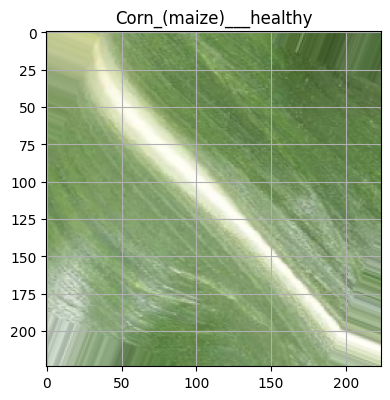

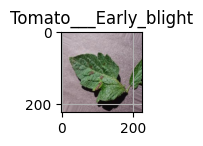

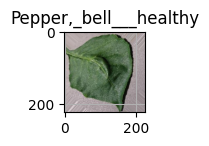

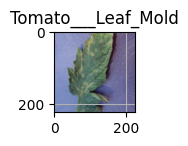

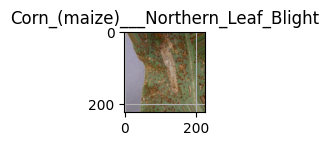

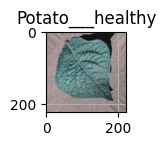

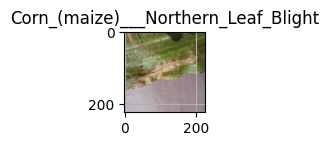

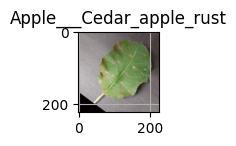

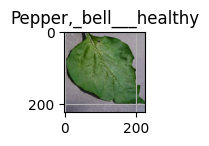

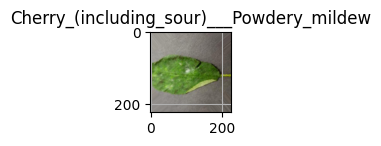

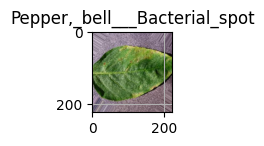

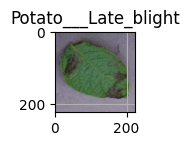

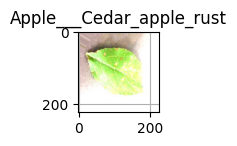

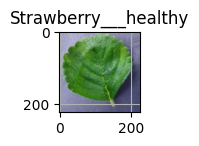

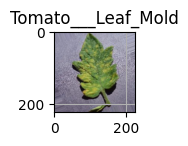

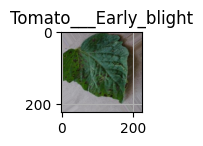

In [6]:
#Display Some of the images
classes = list(train_genrator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch,Y_batch in train_genrator:
  for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_batch[i])
    plt.title(classes[np.where(Y_batch[i]==1)[0][0]])
    plt.grid(None)
    plt.show()
  break

In [7]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [8]:
valid_genrator =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/225.0,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    valid,
    batch_size=164,
    target_size=(size,size),
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle=True,
)

Found 7013 images belonging to 38 classes.


In [9]:
test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_genrator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/225.0,
    preprocessing_function=None,
).flow_from_directory(
    test,
    batch_size=64,
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
)

Found 70295 images belonging to 38 classes.


In [10]:
test_genrator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [12]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1, padding='same',
                              activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(pool_size=2, name='Pool1'))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding='same',activation='relu',name='Conv2'))

model.add(keras.layers.MaxPool2D(pool_size=2, name='Pool2'))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same',activation='relu',name='Conv3'))

model.add(keras.layers.MaxPool2D(pool_size=2, name='Pool3'))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same',activation='relu',name='Conv4'))

model.add(keras.layers.MaxPool2D(pool_size=2, name='Pool4'))

model.add(keras.layers.Flatten(name='Flatten1'))

model.add(keras.layers.Dense(units=128, activation='relu', name='Dense1'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(units=64, activation='relu', name='Dense2'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(units=38, activation='softmax', name='Output'))

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool4 (MaxPooling2D)                 │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,858,406 (26.16 MB)

 Trainable params: 6,858,406 (26.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
EarlyStopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
model_Reduce_RonPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)
callbacks = [EarlyStopping, model_checkpoint, model_Reduce_RonPlateau]

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','precision','recall'])


In [15]:
history = model.fit(train_genrator, epochs=5, validation_data=valid_genrator, callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 907s 2s/step - accuracy: 0.2008 - loss: 2.9176 - precision: 0.6941 - recall: 0.0784 - val_accuracy: 0.5219 - val_loss: 1.6420 - val_precision: 0.6677 - val_recall: 0.4192 - learning_rate: 0.0010
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 780s 2s/step - accuracy: 0.6867 - loss: 1.0123 - precision: 0.8176 - recall: 0.5751 - val_accuracy: 0.7586 - val_loss: 0.7596 - val_precision: 0.8251 - val_recall: 0.7037 - learning_rate: 0.0010
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 792s 2s/step - accuracy: 0.8161 - loss: 0.5866 - precision: 0.8747 - recall: 0.7641 - val_accuracy: 0.8309 - val_loss: 0.5308 - val_precision: 0.8627 - val_recall: 0.8035 - learning_rate: 0.0010
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 772s 2s/step - accuracy: 0.8733 - loss: 0.3983 - precision: 0.9068 - recall: 0.8441 - val_accuracy: 0.8734 - val_loss: 0.3932 - val_precision: 0.8975 - val_recall: 0.8544 - learning_rate: 0.0010
Epoch 5/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 771s 2s/step - accuracy: 

In [16]:
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss) + 1)


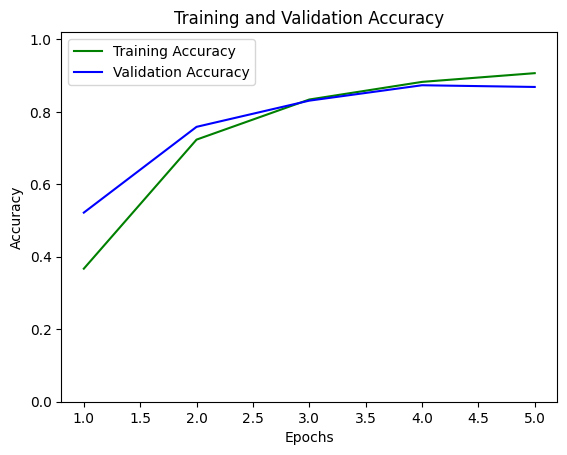

In [17]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1.02)
plt.show()

In [18]:
model_evaluate = model.evaluate(test_genrator)
print('loss:', model_evaluate[0])
print('accuracy:', model_evaluate[1])
print('precision:', model_evaluate[2])
print('recall:', model_evaluate[3])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


429/429 ━━━━━━━━━━━━━━━━━━━━ 153s 356ms/step - accuracy: 0.8766 - loss: 0.3804 - precision: 0.8950 - recall: 0.8613
loss: 0.365129292011261
accuracy: 0.8810157179832458
precision: 0.9024132490158081
recall: 0.862835168838501


In [19]:
#save the model
model.save('cnn_model.h5')